You've been provided the following data set on House Sales in King County. Your task is to build a regression model which can predict the price of a house, based on the features available.

1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

Answer: Please find below all the necessary steps to construct the model and make predictions on house prices, along with a detailed explanation of my approach.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

READ THE DATA

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

Let's see the data and it's properties 

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Check for Duplicates

In [7]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


Note: There are entries with the same ID. This situation can arise when a house is sold multiple times, resulting in multiple entries for the same property.
Therefore, we will retain all the entries.

In [8]:
Mean_House_Price=(df["price"].mean())
print(Mean_House_Price)

540088.1417665294


Note the average price of house is $540,088.142.

Now, Let's start analyzing the data and remove outliers.

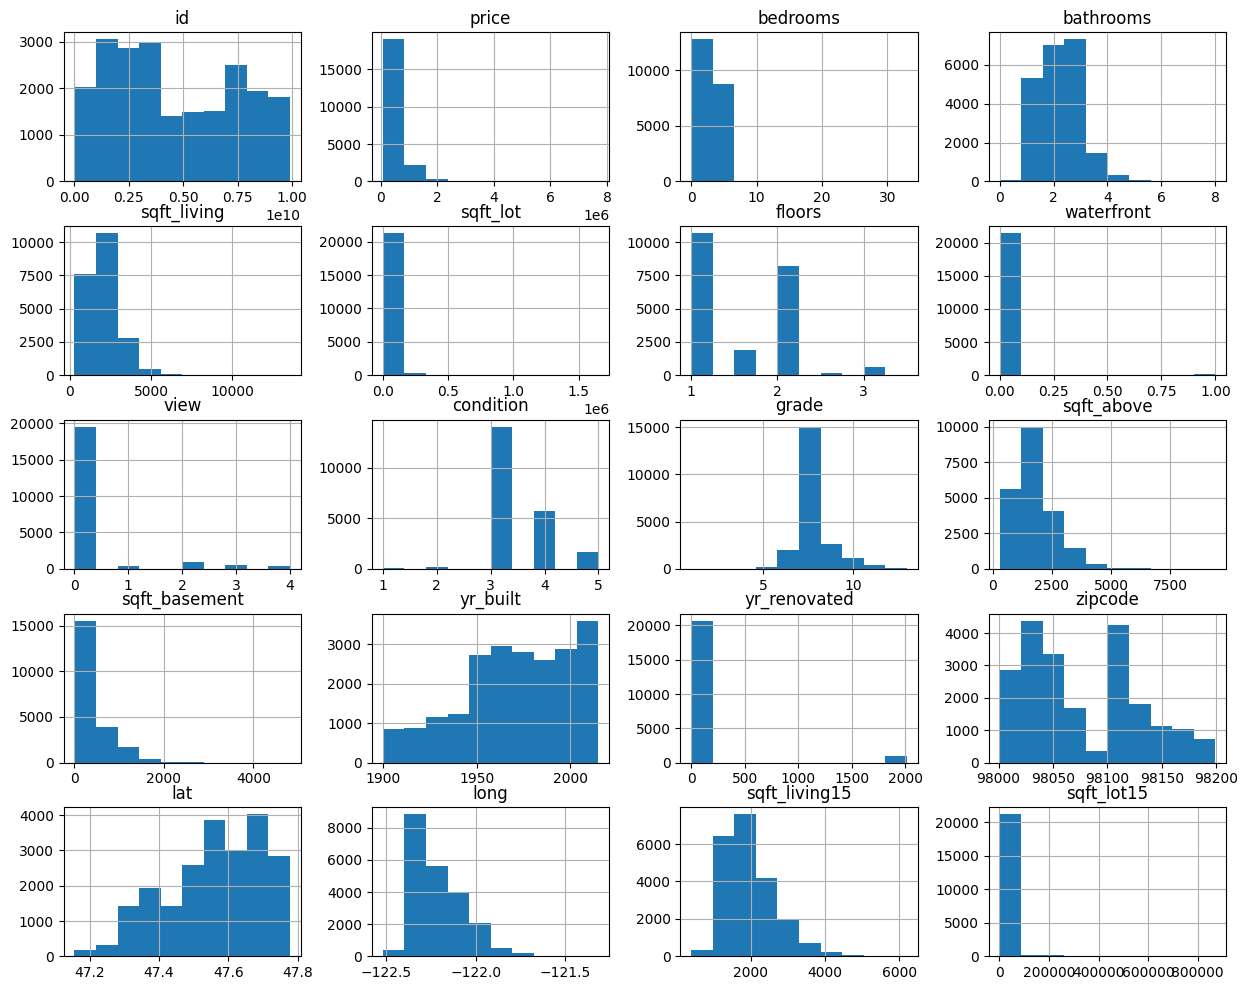

In [9]:
df.hist(figsize = (15,12))
plt.show()

Note that most of the features appears to be on a reasonable scale with no apparent outliers.

Let's check for potential outliers in bedrooms, bathrooms and the sqft-type features.

In [10]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

We should investigate more on houses which has more than 9 bedroom.

In [11]:
df[(df['bedrooms'] == 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [12]:
df[(df['bedrooms'] == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.0,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [13]:
df[(df['bedrooms'] == 33)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Based on the analysis and observations, it appears that all the houses, except for the one with ID "627300145," are likely data entry errors. The unrealistic combination of a high number of bedrooms and a low number of bathrooms suggests a data entry issue. For instance, a property with 33 bedrooms and 1.75 bathrooms is highly unlikely and seems to be a mistake. It is reasonable to assume that it should have been a 3-bedroom house.

Considering this, it is appropriate to drop these rows from the dataset rather than attempting to fix the data.

In [14]:
ids_to_drop = [5566100170,8812401450,1773100755, 2402100895]
# Drop rows based on IDs
df = df[~df['id'].isin(ids_to_drop)]

In [15]:
df[(df['bedrooms']==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


Houses with no bedrooms and no bathrooms are not suitable for our analysis and are likely to be errors. Therefore, we should proceed to drop these cases from the dataset.

In [16]:
df = df[df['bedrooms'] != 0]

In [17]:
df[(df['bathrooms']==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


In [18]:
df = df[df['bathrooms'] != 0]

Let's also drop all the houses where number of bathrooms are greater than number of bedrooms

In [19]:
df[(df['bathrooms'] > df['bedrooms']+1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
450,4055700030,20150502T000000,1450000.0,3,4.50,3970,24920,2.0,0,2,...,10,3260,710,1977,1999,98034,47.7183,-122.258,2610,13838
471,8651611170,20150213T000000,868700.0,3,4.25,3840,6161,2.0,0,0,...,10,3840,0,2000,0,98074,47.6336,-122.064,3230,7709
1261,7636800041,20140625T000000,995000.0,3,4.50,4380,47044,2.0,1,3,...,9,3720,660,1968,1990,98166,47.4734,-122.365,2460,18512
1987,1118002090,20140628T000000,1600000.0,3,4.25,2820,7200,2.0,0,0,...,10,2460,360,1930,0,98112,47.6298,-122.290,3300,7522
2339,1724069062,20140714T000000,1365000.0,2,3.25,2700,3444,3.0,1,3,...,9,2700,0,1990,0,98075,47.5684,-122.060,2710,3444
2439,3278601940,20140806T000000,349950.0,2,3.25,1570,2031,2.0,0,0,...,8,1310,260,2006,0,98126,47.5480,-122.375,1570,2039
3020,3377900195,20140929T000000,2525000.0,4,5.50,6930,45100,1.0,0,0,...,11,4310,2620,1950,1991,98006,47.5547,-122.144,2560,37766
3100,622069006,20140820T000000,1500000.0,4,5.50,6550,217374,1.0,0,0,...,11,5400,1150,2006,0,98058,47.4302,-122.095,4110,50378
3121,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,0,...,11,6110,0,2005,0,98059,47.5285,-122.135,4190,10762
4149,6447300265,20141014T000000,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996


In [20]:
df = df[df['bathrooms'] <= df['bedrooms'] + 1]

"In most large data sets, 99% of values have a Z-score between -3 and 3, meaning they lie within three standard deviations above or below the mean."

To ensure our model fits the majority of the data and improve the quality of our visualisations and exploratory data analysis, I want to drop entries with a z-score above 3 (i.e. where the value is more than 3 standard deviations from the mean) for few features.

In [21]:
# Check initial size of df to see how much data we lost
originalsize = len(df)
originalsize

21550

In [22]:
def remove_outliers(df):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [23]:
# Apply function to df
df = remove_outliers(df)

In [24]:
# See size of df now
newsize = len(df)
newsize

19969

In [25]:
# Get % of data removed
round((originalsize-newsize)/originalsize*100,2)

7.34

We removed 7.34% of our data.

Let us also investigate the target variable 'price' to see if we can make any further adjustments to exclude outliers.

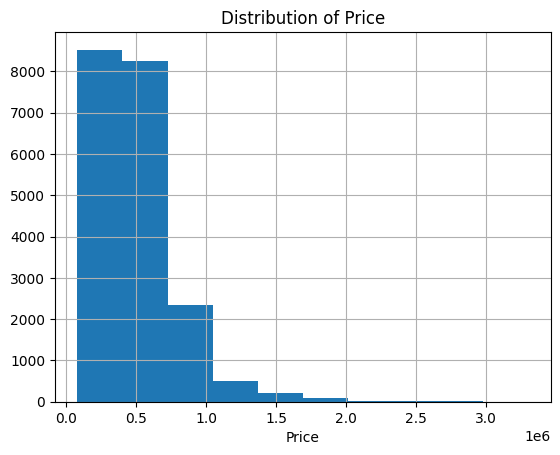

In [26]:
# View price distribution
df['price'].hist()
plt.xlabel('Price')
plt.title('Distribution of Price')
plt.show()

In [27]:
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 824000.0
0.91 percentile: 845000.0
0.92 percentile: 870000.0
0.93 percentile: 900000.0
0.94 percentile: 935000.0
0.95 percentile: 980000.0
0.96 percentile: 1058996.0
0.97 percentile: 1185998.4
0.98 percentile: 1309820.0
0.99 percentile: 1565000.0


Let's remove houses with price above $1.5m.

In [28]:
df = df[df['price']<1500000]

In [29]:
# See size of df now
newsize = len(df)
newsize

19734

Create a new Variable, house age.

In [30]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['Year'] = df['date'].dt.year
df['house_age'] = df['Year'] - df['yr_built']

To clean the dataset, we will start by removing irrelevant columns. Although there are no null values, we will still check for any remaining inconsistencies or issues and proceed to drop them.

In [31]:
# Drop irrelevant columns
df1 = df.drop(['id', 'date'], axis=1)
# Handle missing values
df1 = df1.dropna()

Let's Separate the features and target variable:

To create the input matrix for our regression model, we need to separate the 'price' column, which is the target variable we want to predict, from the remaining features.

In [32]:

X = df1.drop('price', axis=1)
y = df1['price']

Create Dummy Variables

The following variables are categorical in nature

waterfront: '1' if the property has a waterfront, '0' if not.

view: An index from 0 to 4 indicating the quality of the property's view.

condition: Condition of the house, ranked from 1 to 5.

grade: Classification by construction quality, which denotes the types of materials used and the quality of workmanship. This is a discrete ordinal variable.

zipcode: 5-digit zip code.

It is appropriate to treat them as categorical variables.

This process will assign binary values, allowing the model to consider them as categorical features during the regression analysis.

In [33]:
categorical_cols = ['zipcode', 'grade', 'condition', 'view', 'waterfront']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [34]:
X_encoded

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,grade_12,condition_2,condition_3,condition_4,condition_5,view_1,view_2,view_3,view_4,waterfront_1
0,3,1.00,1180,5650,1.0,1180,0,1955,0,47.5112,...,False,False,True,False,False,False,False,False,False,False
1,3,2.25,2570,7242,2.0,2170,400,1951,1991,47.7210,...,False,False,True,False,False,False,False,False,False,False
2,2,1.00,770,10000,1.0,770,0,1933,0,47.7379,...,False,False,True,False,False,False,False,False,False,False
3,4,3.00,1960,5000,1.0,1050,910,1965,0,47.5208,...,False,False,False,False,True,False,False,False,False,False
4,3,2.00,1680,8080,1.0,1680,0,1987,0,47.6168,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,2009,0,47.6993,...,False,False,True,False,False,False,False,False,False,False
21609,4,2.50,2310,5813,2.0,2310,0,2014,0,47.5107,...,False,False,True,False,False,False,False,False,False,False
21610,2,0.75,1020,1350,2.0,1020,0,2009,0,47.5944,...,False,False,True,False,False,False,False,False,False,False
21611,3,2.50,1600,2388,2.0,1600,0,2004,0,47.5345,...,False,False,True,False,False,False,False,False,False,False


Scaling:

"Scaling is done on a dataset to ensure that all features are on a similar scale or magnitude. It is an essential preprocessing step in many machine learning algorithms.  Scaling is performed on a dataset to ensure fair treatment of features."

"Regularization: Regularization techniques, such as Ridge and Lasso regression, involve adding penalty terms to the loss function to prevent overfitting. These regularization terms assume that all features have similar scales. Scaling the features ensures that the regularization penalty is applied uniformly to all features."

To ensure all variables are on a similar scale, I am using below code to scale the datasets.

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [36]:
X_scaled

array([[-0.37588719, -1.50830657, -1.0531798 , ..., -0.13573468,
        -0.09540475, -0.05923489],
       [-0.37588719,  0.30682691,  0.83994018, ..., -0.13573468,
        -0.09540475, -0.05923489],
       [-1.54128512, -1.50830657, -1.6115821 , ..., -0.13573468,
        -0.09540475, -0.05923489],
       ...,
       [-1.54128512, -1.87133326, -1.2710929 , ..., -0.13573468,
        -0.09540475, -0.05923489],
       [-0.37588719,  0.66985361, -0.48115794, ..., -0.13573468,
        -0.09540475, -0.05923489],
       [-1.54128512, -1.87133326, -1.2710929 , ..., -0.13573468,
        -0.09540475, -0.05923489]])

Now we need to split the dataset into training and testing sets.

test_size: In this case, 0.2 represents 20% of the data, which will be used for testing, while the remaining 80% will be used for training.
random_state: The seed value used by the random number generator for reproducibility. This number can be chose arbitarily and I am using 42

In [37]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In our dataset, we have several predictors that are expected to be highly relevant for making predictions. Therefore, I have chosen Ridge regression as it is a suitable regularized linear regression method. I am also using various alpha values, so that we can observe different outcomes and select the best model.

Next, we will proceed to make predictions on the test set and evaluate the performance of the model using root mean squared error (RMSE) metrics. These metrics will provide insights into the accuracy and precision of the model's predictions.

In [38]:
from sklearn.metrics import r2_score
alphas = [10,5,1,0.75,0.5,0.3,0.1]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Ridge Regression (alpha={alpha}): RMSE = {rmse}")
    print(f"R-squared error (R^2):  (alpha={alpha}): RMSE = {r2}")


Ridge Regression (alpha=10): RMSE = 92207.500381498
R-squared error (R^2):  (alpha=10): RMSE = 0.8456527243732896
Ridge Regression (alpha=5): RMSE = 92199.72970869474
R-squared error (R^2):  (alpha=5): RMSE = 0.8456787381277844
Ridge Regression (alpha=1): RMSE = 92185.85842694185
R-squared error (R^2):  (alpha=1): RMSE = 0.845725169341486
Ridge Regression (alpha=0.75): RMSE = 92183.03229079905
R-squared error (R^2):  (alpha=0.75): RMSE = 0.8457346283843163
Ridge Regression (alpha=0.5): RMSE = 92179.39652250407
R-squared error (R^2):  (alpha=0.5): RMSE = 0.8457467968294752
Ridge Regression (alpha=0.3): RMSE = 92175.67747473193
R-squared error (R^2):  (alpha=0.3): RMSE = 0.8457592435036901
Ridge Regression (alpha=0.1): RMSE = 92170.95158818676
R-squared error (R^2):  (alpha=0.1): RMSE = 0.845775059077813


Let's try other methods as well, to see if we can get better RMSE value 

In [39]:
alphas = [1,0.75,0.5,0.3,0.1]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
    print(f"Lasso Regression: RMSE = (alpha={alpha}): RMSE = {rmse_lasso}")
    print(f"R-squared error (R^2):  (alpha={alpha}): RMSE = {r2}")


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+13, tolerance: 8.684e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: RMSE = (alpha=1): RMSE = 92186.67372848056
R-squared error (R^2):  (alpha=1): RMSE = 0.845775059077813


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+13, tolerance: 8.684e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: RMSE = (alpha=0.75): RMSE = 92186.28227117137
R-squared error (R^2):  (alpha=0.75): RMSE = 0.845775059077813


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+13, tolerance: 8.684e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: RMSE = (alpha=0.5): RMSE = 92185.90432777502
R-squared error (R^2):  (alpha=0.5): RMSE = 0.845775059077813


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.832e+13, tolerance: 8.684e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: RMSE = (alpha=0.3): RMSE = 92185.6116741428
R-squared error (R^2):  (alpha=0.3): RMSE = 0.845775059077813
Lasso Regression: RMSE = (alpha=0.1): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=0.1): RMSE = 0.845775059077813


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.676e+13, tolerance: 8.684e+10
  model = cd_fast.enet_coordinate_descent(


In [40]:
alphas = [10, 5, 1,0.75,0.5,0.3,0.1]
for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net.fit(X_train, y_train)
    y_pred_en = elastic_net.predict(X_test)
    rmse_en = mean_squared_error(y_test, y_pred_en, squared=False)
    r2 = r2_score(y_test, y_pred)
    rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
    print(f"Lasso Regression: RMSE = (alpha={alpha}): RMSE = {rmse_lasso}")
    print(f"R-squared error (R^2):  (alpha={alpha}): RMSE = {r2}")


Lasso Regression: RMSE = (alpha=10): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=10): RMSE = 0.845775059077813
Lasso Regression: RMSE = (alpha=5): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=5): RMSE = 0.845775059077813
Lasso Regression: RMSE = (alpha=1): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=1): RMSE = 0.845775059077813
Lasso Regression: RMSE = (alpha=0.75): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=0.75): RMSE = 0.845775059077813
Lasso Regression: RMSE = (alpha=0.5): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=0.5): RMSE = 0.845775059077813
Lasso Regression: RMSE = (alpha=0.3): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=0.3): RMSE = 0.845775059077813
Lasso Regression: RMSE = (alpha=0.1): RMSE = 92185.32767150781
R-squared error (R^2):  (alpha=0.1): RMSE = 0.845775059077813


Note R-square error value is 0.846.

We will consider RMSE value obtained from Ridge at Alpha 0.1 which is 92179.89762186715 for our analysis, since it is the best value.

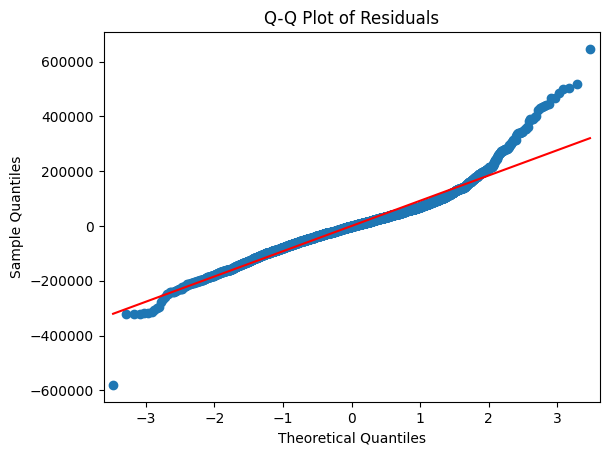

In [41]:
residuals = y_test - y_pred
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

The residuals display mostly normal distribution characteristics, with a slight positive skewness. This suggests that the model's predictions may be influenced by more extreme positive values.

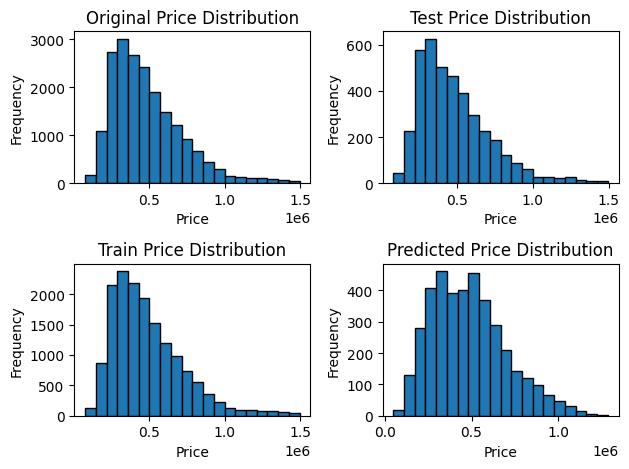

In [42]:
#original price vs Frequency
plt.subplot(2, 2, 1)
plt.hist(df1['price'], bins=20, edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Test Price vs Frequency
plt.subplot(2, 2, 2)
plt.hist(y_test, bins=20, edgecolor='black')
plt.title('Test Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Train Price vs Frequency
plt.subplot(2, 2, 3)
plt.hist(y_train, bins=20, edgecolor='black')
plt.title('Train Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Predicted Price vs Frequency
plt.subplot(2, 2, 4)
plt.hist(y_pred, bins=20, edgecolor='black')
plt.title('Predicted Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

To see a more clear picture of how our model is performing, I have implemented the below graph which shows the count of various price on test data vs predicted value

<Axes: xlabel='price', ylabel='Count'>

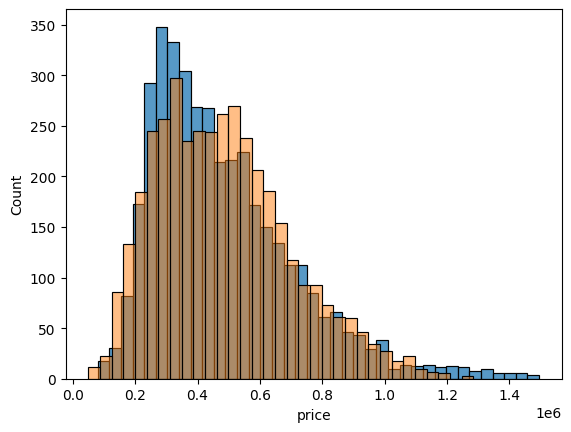

In [43]:
sns.histplot(y_test)
sns.histplot(y_pred, alpha=0.5)

We can observe the performance of the model. The distribution of the original price and the predicted price on the training set appears to be similar. When the test price is lower, the model's predictions are reasonably accurate. However, for higher prices, the model tends to overestimate the actual price.

Note: This is because we have removed prices above 1.5 Million in the cleaning process.

Best RMSE value when alpha = 0.1 from ridge

In [44]:
print(rmse)

92170.95158818676


Let's find Normalized Root Mean Square Error 

NRMSE = RMSE/mean (observed)

In [45]:
nrmse=rmse/Mean_House_Price
print(nrmse)

0.17065909147109296


2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

Answer:

After utilizing various prediction techniques, we obtained different RMSE values. Among them, the lowest RMSE value is considered the best. In this case, the 'ridge' method with an alpha value of 0.1 yielded the optimal RMSE value of 92170.95158818676.

Given the average house price of 540088.1417665294, an RMSE value of 92170.9 indicates that when the model makes a prediction, it could deviate by approximately 92170.9 in either direction. For instance, the model might predict a house to sell for 500,000, but in reality, the house sells for 592170.9.

The normalized RMSE (NRMSE) is 0.171, indicating that the prediction rate of the model is within +/- 17.1% of the actual price.

R- square value: 0.8465. It means that approximately 84.7% of the variance in the dependent variable can be explained by the independent variables in the model. 

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

Let's find the feature other than price that is most correlated with price.

In [46]:
df1.corr()['price'].sort_values()

house_age       -0.011569
zipcode         -0.000805
Year             0.002843
yr_built         0.011615
long             0.023690
condition        0.064450
waterfront       0.085269
sqft_lot         0.088338
sqft_lot15       0.089668
yr_renovated     0.118730
floors           0.252799
sqft_basement    0.275350
bedrooms         0.293677
view             0.300542
lat              0.422884
bathrooms        0.437979
sqft_above       0.497954
sqft_living15    0.541713
sqft_living      0.614091
grade            0.625472
price            1.000000
Name: price, dtype: float64

Based on the correlation analysis, we can conclude that the prices are primarily influenced and correlated with the following factors:

Location, Waterfront, Grade.

Additionally, it is evident that the number of bedrooms, bathrooms, square footage, and grade also have a significant impact on the prices, as expected.

C:\Users\rahul\AppData\Local\Temp\ipykernel_26988\3387350677.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(smap, label = 'price')


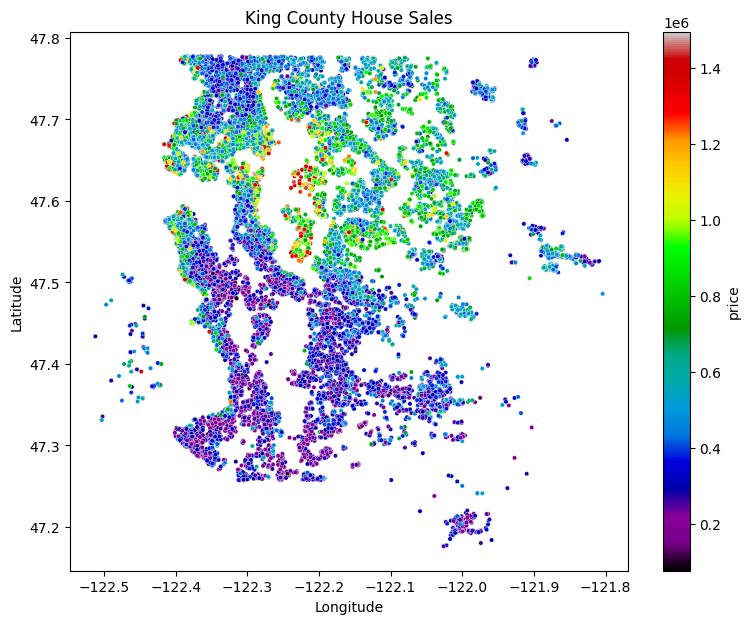

In [47]:
# Plot scatter plot
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df1['long'], y = df1['lat'], hue = df1['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = df1)

norm = plt.Normalize(df1['price'].min(), df1['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

Based on the provided visualization, we can make initial observations regarding the geographical locations of the houses. It is evident that the highest house prices are concentrated in the vicinity where the latitude is approximately 47.6 and the longitude is around -122.25

Let's check how water front affect the prices. 

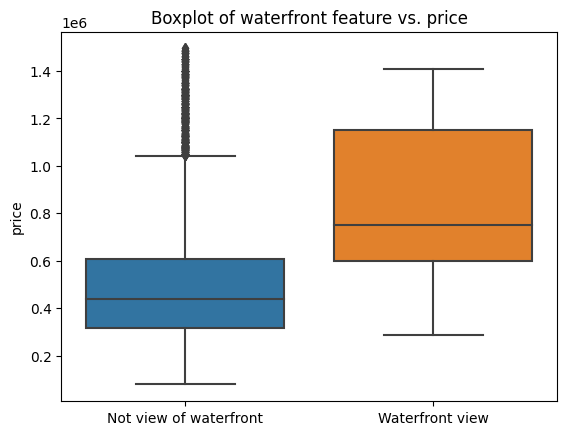

In [48]:
sns.boxplot(x = df1['waterfront'], y = df1['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [49]:
waterfrontmean = df1[df1['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df1[df1['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 825515.83
The mean house price for a house without waterfront view is USD 486655.99


We can clearly see that the price of houses with waterfront view is almost double to the houses which are not.

Now let's check for grade

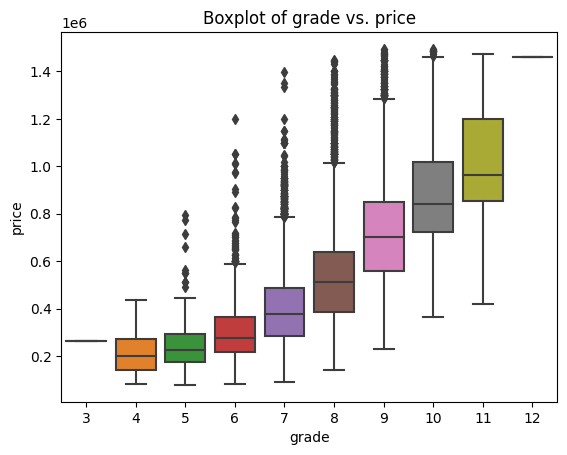

In [50]:

sns.boxplot(x = df1['grade'], y = df1['price'])
plt.title("Boxplot of grade vs. price")
plt.ylabel("price")
plt.xlabel("grade")
plt.show()

Grade clearly affects the price, Higher grade more is the price.

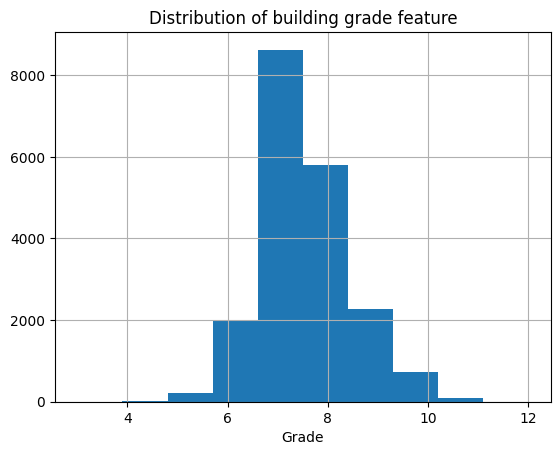

In [51]:
df1['grade'].hist()
plt.title('Distribution of building grade feature')
plt.xlabel('Grade')
plt.show()

3.  Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

Answer 3: 

After conducting a thorough analysis and building predictive models, I am now able to provide my findings regarding the main drivers of house prices in King City and their impact on the price.

Based on the analysis, several factors have been identified as significant influencers of house prices in King City. These main drivers are as follows:

Location:
The latitude and longitude coordinates of a property show a strong positive correlation with house prices. This implies that properties located in desirable areas command higher prices. Notably, the highest house prices are concentrated around a latitude of approximately 47.6 and a longitude of around -122.25.

Waterfront:
The presence of a waterfront view stands out as one of the most influential factors. It is evident that houses with a waterfront view tend to have prices almost double compared to those without.

Size and Features:
The size of a house, measured in terms of square footage, has a significant impact on its price. Additionally, features such as the number of bedrooms, bathrooms, and floors also positively influence the price.

Condition and Renovation:
The condition of a house and whether it has undergone renovations in the past can affect its price. Houses in better condition and those that have been recently renovated tend to command higher prices.

Grade:
The overall grade of a house, which reflects its quality of construction and design, demonstrates a positive correlation with the price. Generally, houses with higher grades have higher prices, and in our data, the median grade is 7.

Neighborhood:
The zip code representing the neighborhood of a property exhibits a moderate negative correlation with the price. This suggests that certain zip codes may have relatively lower-priced properties compared to others.

In conclusion, the analysis indicates that the main drivers of house prices in King City encompass location, waterfront view, size and features, condition and renovation, grade, and neighborhood.

Properties situated in desirable locations, with waterfront views, larger sizes, more bedrooms and bathrooms, better conditions and recent renovations, higher grades, and specific zip codes tend to have higher prices.